In [1]:
#1. 데이터 전처리 및 결측치 처리하기 
#1.1. 데이터 로드
import pandas as pd
import numpy as np

columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model year", "origin", "car name"
]
df = pd.read_csv("data/auto-mpg.csv", names=columns, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [2]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].isnull().sum()  #6

6

In [3]:
#1.2. 결측치 확인 및 중앙값으로 대체
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['horsepower'].isnull().sum() 

C:\Users\123cl\AppData\Local\Temp\ipykernel_37492\1126456398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


0

In [4]:
#2. 조건부 데이터 필터링 및 새로운 열 생성
#2.1. 연비(mpg)가 30 이상인 차량만 필터링하여 high_mpg라는 새로운 데이터프레임 생성
high_mpg=df[df['mpg']>=30]

#2.2. high_mpg 데이터에 무게(weight) 대비 마력(horsepower)의 비율을 나타내는 hp_weight_ratio라는 새로운 열을 추가
high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight'] * 100
high_mpg

C:\Users\123cl\AppData\Local\Temp\ipykernel_37492\938012942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight'] * 100


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,hp_weight_ratio
51,30.0,4,79.0,70.0,2074.0,19.5,71,2,peugeot 304,3.375121
52,30.0,4,88.0,76.0,2065.0,14.5,71,2,fiat 124b,3.680387
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200,3.666103
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,datsun 1200,4.277743
129,31.0,4,79.0,67.0,1950.0,19.0,74,3,datsun b210,3.435897
...,...,...,...,...,...,...,...,...,...,...
390,32.0,4,144.0,96.0,2665.0,13.9,82,3,toyota celica gt,3.602251
391,36.0,4,135.0,84.0,2370.0,13.0,82,1,dodge charger 2.2,3.544304
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,2.441315
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,3.660131


In [5]:
#3. 그룹화 및 통계분석심화
#cylinders와 origin을 기준으로 그룹화하여, 그룹별로 계산
group= high_mpg.groupby(['cylinders', 'origin'])
#3.1. mpg의 평균값과 표준편차
case1= group['mpg'].agg(['mean', 'std'])
print(case1)
#3.2. horsepower의 최댓값, 최솟값
case2= group['horsepower'].agg(['max', 'min'])
print(case2)

                       mean       std
cylinders origin                     
4         1       33.504545  2.653027
          2       35.910000  5.177370
          3       34.632609  3.592959
5         2       36.400000       NaN
6         1       38.000000       NaN
          2       30.700000       NaN
          3       32.700000       NaN
                         max    min
cylinders origin                   
4         1        90.000000   63.0
          2       104.469388   48.0
          3       100.000000   52.0
5         2        67.000000   67.0
6         1        85.000000   85.0
          2        76.000000   76.0
          3       132.000000  132.0


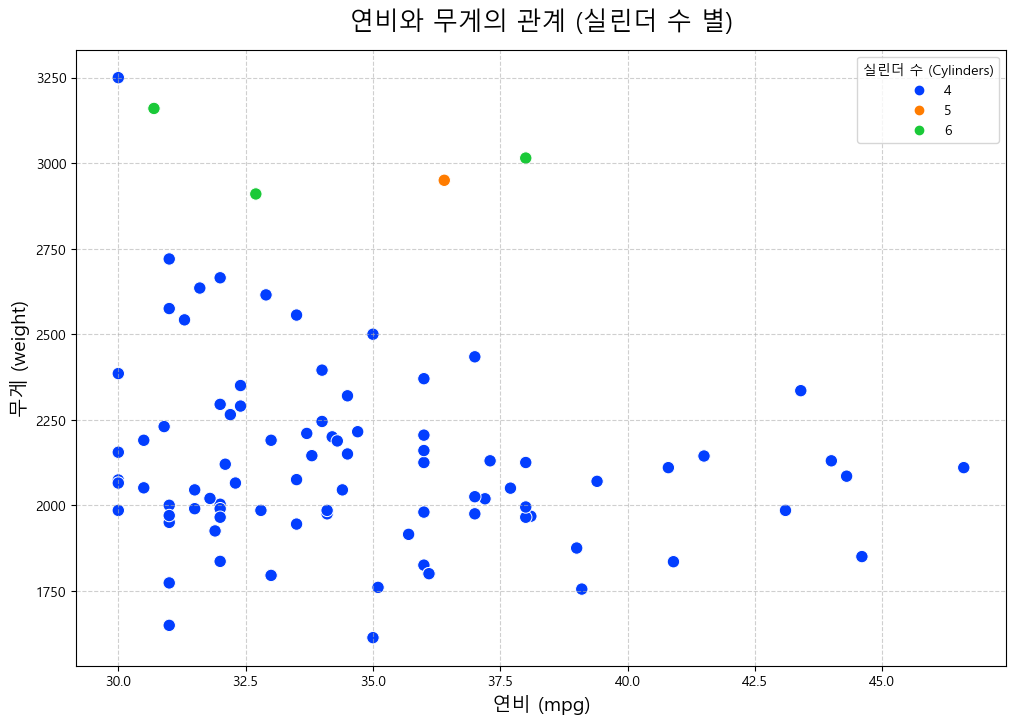

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

def set_korean_font():
    """matplotlib에서 한글 폰트를 설정합니다."""
    font_name = None
    for font in fm.fontManager.ttflist:
        if 'Malgun Gothic' in font.name: font_name = font.name; break
        elif 'AppleGothic' in font.name: font_name = font.name; break
        elif 'NanumGothic' in font.name: font_name = font.name; break
    
    if font_name:
        plt.rcParams['font.family'] = font_name
        plt.rcParams['axes.unicode_minus'] = False
set_korean_font()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=high_mpg, 
                x='mpg', 
                y='weight', 
                hue='cylinders',
                palette='bright',
                s=80)

plt.title('연비와 무게의 관계 (실린더 수 별)', fontsize=18, pad=15)
plt.xlabel('연비 (mpg)', fontsize=14)
plt.ylabel('무게 (weight)', fontsize=14)
plt.legend(title='실린더 수 (Cylinders)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

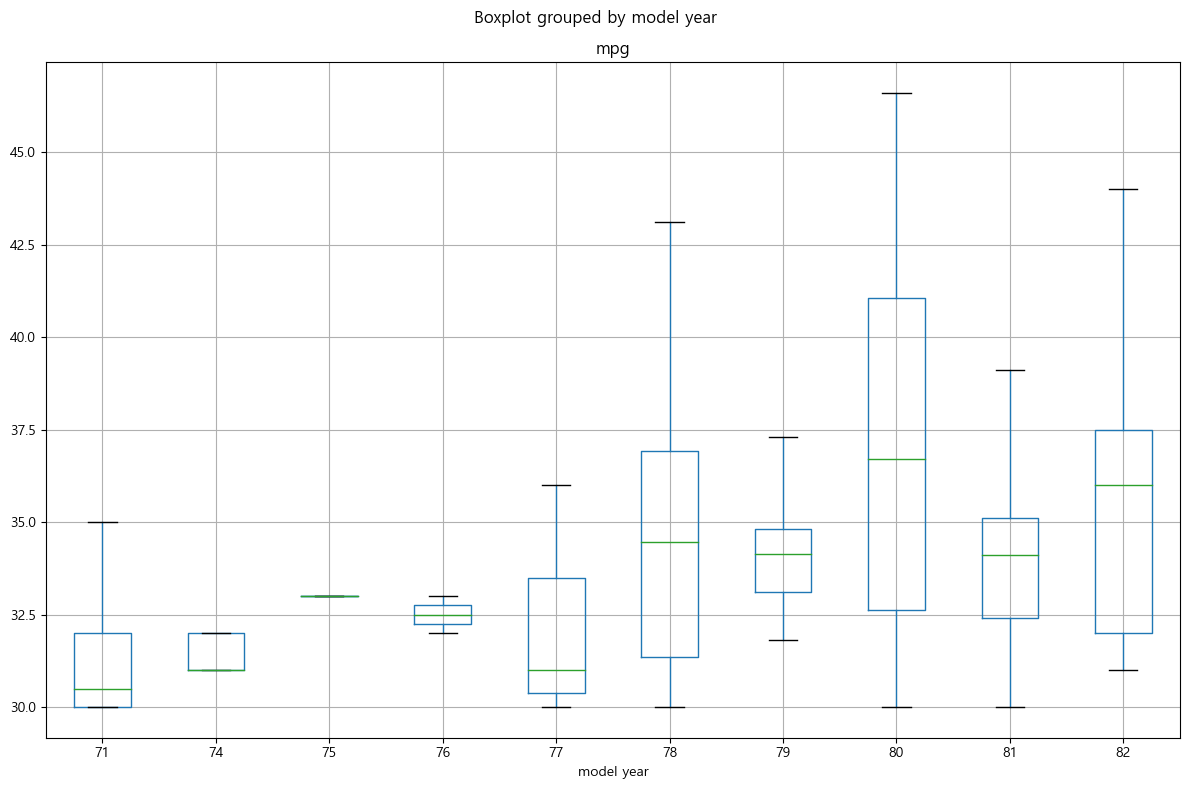

In [7]:
#4.2. model_year에 따른 mpg의 변화를 박스플롯으로 시각화
high_mpg.boxplot(column='mpg', by='model year', 
                 figsize=(12, 8),
                 grid=True)


plt.tight_layout()
plt.show()

               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.80       -0.77   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.51   
displacement -0.80       0.95          1.00        0.89    0.93         -0.54   
horsepower   -0.77       0.84          0.89        1.00    0.86         -0.68   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.51         -0.54       -0.68   -0.42          1.00   
model year    0.58      -0.35         -0.37       -0.41   -0.31          0.29   
origin        0.56      -0.56         -0.61       -0.45   -0.58          0.21   

              model year  origin  
mpg                 0.58    0.56  
cylinders          -0.35   -0.56  
displacement       -0.37   -0.61  
horsepower         -0.41   -0.45  
weight             -0.31   -0.58  
acceleration        0.29    0.21  
model year          1.00 

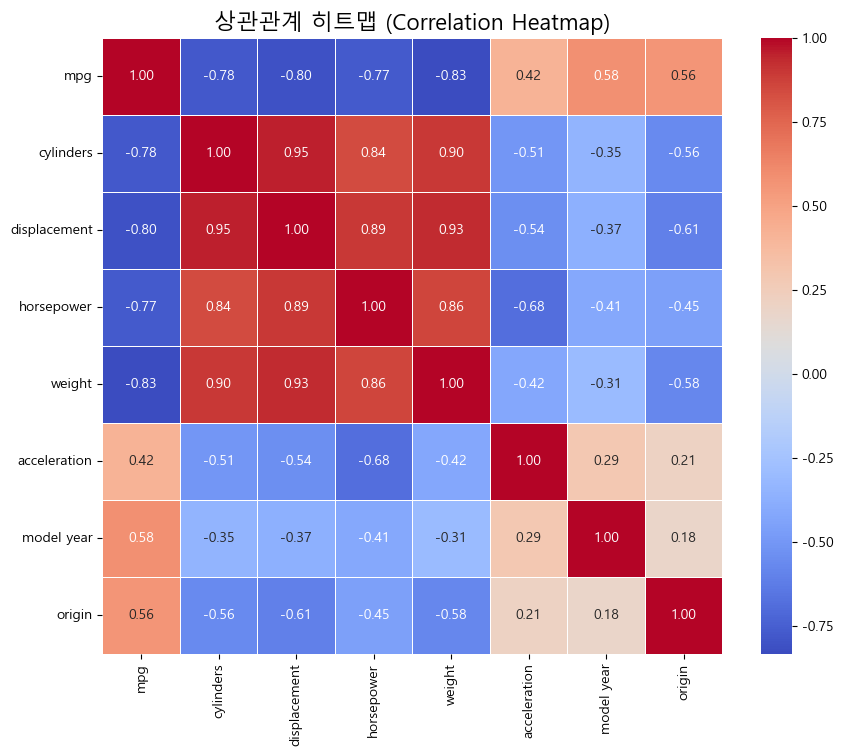

In [8]:
#5. 상관분석 및 히트맵 시각화
#5.1. 데이터의 모든 수치형 열 간 상관계수 매트릭스를 구하기
numeric_df = df.drop(columns=['car name'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(2))
#5.2. Seaborn을 활용하여 상관계수 히트맵을 시각화 하고, 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름을 적기
plt.figure(figsize=(10, 8)) # 그래프 크기 설정
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 값 표시
            fmt='.2f',       # 소수점 2자리까지 표시
            cmap='coolwarm', # 색상 맵 (양의 상관: 붉은색, 음의 상관: 푸른색)
            linewidths=.5)   # 셀 사이의 선 굵기
plt.title('상관관계 히트맵 (Correlation Heatmap)', fontsize=16)
plt.show()


corr_abs = corr_matrix.abs()


🔹 상관계수 행렬:
               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.80       -0.77   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.51   
displacement -0.80       0.95          1.00        0.89    0.93         -0.54   
horsepower   -0.77       0.84          0.89        1.00    0.86         -0.68   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.51         -0.54       -0.68   -0.42          1.00   
model year    0.58      -0.35         -0.37       -0.41   -0.31          0.29   
origin        0.56      -0.56         -0.61       -0.45   -0.58          0.21   

              model year  origin  
mpg                 0.58    0.56  
cylinders          -0.35   -0.56  
displacement       -0.37   -0.61  
horsepower         -0.41   -0.45  
weight             -0.31   -0.58  
acceleration        0.29    0.21  
model year    

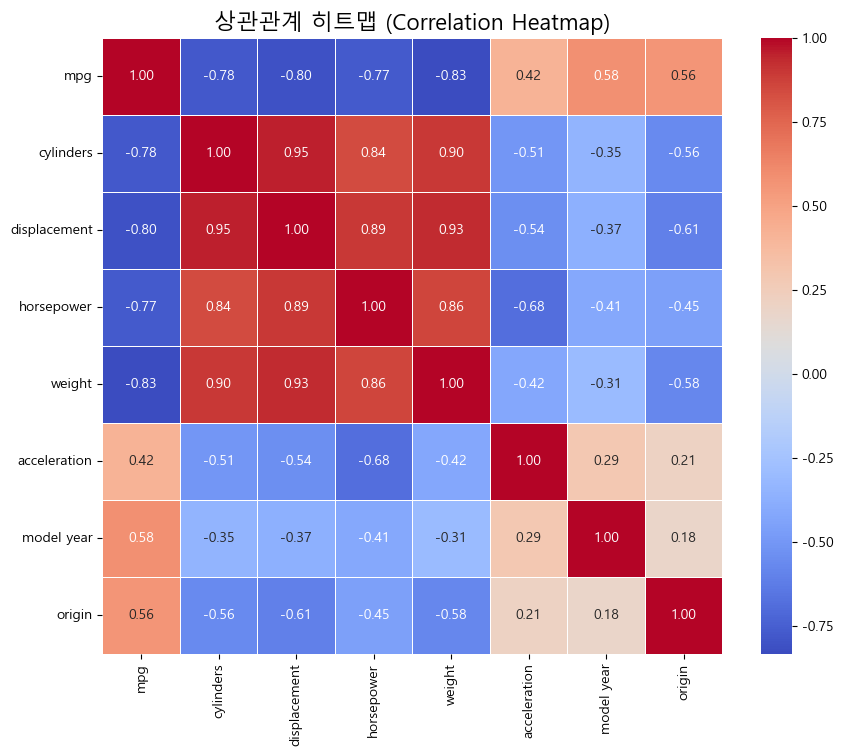

변수 쌍: cylinders, displacement
상관계수 (절댓값): 0.9507


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 5.1. 데이터의 모든 수치형 열 간 상관계수 매트릭스를 구하기
# 'car name'을 제외한 모든 열이 수치형이므로 그대로 사용하거나, 명시적으로 선택할 수 있습니다.
numeric_df = df.drop(columns=['car name'])
corr_matrix = numeric_df.corr()

print("🔹 상관계수 행렬:")
# 보기 좋게 소수점 2자리까지만 출력
print(corr_matrix.round(2))


# 5.2. Seaborn을 활용하여 상관계수 히트맵을 시각화
print("\n🔹 상관계수 히트맵:")
plt.figure(figsize=(10, 8)) # 그래프 크기 설정
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 값 표시
            fmt='.2f',       # 소수점 2자리까지 표시
            cmap='coolwarm', # 색상 맵 (양의 상관: 붉은색, 음의 상관: 푸른색)
            linewidths=.5)   # 셀 사이의 선 굵기
plt.title('상관관계 히트맵 (Correlation Heatmap)', fontsize=16)
plt.show()


# 5.3. 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름 찾기
# 1. 상관계수 행렬의 절댓값을 취함
corr_abs = corr_matrix.abs()

# 2. 대각선을 NaN으로 채워 자기 자신과의 비교를 제외
np.fill_diagonal(corr_abs.values, np.nan)

# 3. 가장 큰 값 찾기
max_corr = corr_abs.max().max()
max_corr_pair = corr_abs.stack().idxmax()
print(f"변수 쌍: {max_corr_pair[0]}, {max_corr_pair[1]}")
print(f"상관계수 (절댓값): {max_corr:.4f}")